[From Bob Nasuti, grab your wallet and take a seat:](https://fivethirtyeight.com/features/hark-two-holiday-puzzles/)

Consider a game of chance called Left, Right, Center. Everyone sits in a circle and begins with some \$1 bills. Taking turns, each person rolls three dice. For each die, if you roll a 1 or 2 you give a dollar to the person on your left, if you roll a 3 or 4 you give a dollar to the person on your right, and if you roll a 5 or 6 you put a dollar in the middle. The moment only a single person has any money left, the game ends and that person gets all the money in the center.

How long is the game expected to last for six players each starting with three \$1 bills? For X players each starting with Y $1 bills?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
outcomes_ = {1:'$1 to left',2:'$1 to left',3:'$1 to right',4:'$1 to right',5:'$1 to middle',6:'$1 to middle'}
outcomes_update = {1:[1,-1,0],2:[1,-1,0],3:[0,-1,1],4:[0,-1,1],5:[0,-1,0],6:[0,-1,0]}
def dice():
    return np.random.choice(np.arange(1,7),size=1,replace=False)[0]

# 6 players starting with three \$1 bills

In [3]:
def one_round(initial,count,print_ = False):
    for ii,player in enumerate(initial):
        left = ii - 1 if (ii - 1 > -1) else len(initial)-1
        right = ii + 1 if (ii + 1 <len(initial)) else 0
        update_ = initial
        #print(update_)
        for _ in range(3):
            outcome = outcomes_update[dice()]
            count += 1
            if print_:
                print([left,ii,right],outcome)
            if update_[ii] + outcome[1] >=0:
                update_[ii] = update_[ii] + outcome[1]
                update_[left] = update_[left] + outcome[0]
                update_[right] = update_[right] + outcome[-1]
                if print_:
                    print(update_)
            else:
                pass
        initial = update_
        if len(np.nonzero(initial)[0])<=1:
            #print(initial)
            return initial,count
            break
    else:
        return initial,count

In [5]:
results = []
simulate = int(1e4)
m = 3
n = 3
for _ in range(simulate):
    initial = np.array([m for _ in range(n)])
    count = 0
    for _ in range(90):
        initial,count=one_round(initial,count)
        if len(np.nonzero(initial)[0])<=1:
            break
    
    results.append(count)

In [6]:
print('%d players each with $%d,%.4f+/-%.4f'%(m,n,np.mean(results)/3,np.std(np.array(results)/3)))

3 players each with $3,6.8800+/-2.7716


In [7]:
n_players = np.arange(3,10)
n_bills = np.arange(3,15)
simulate = int(1e4)
results = {}
for m in n_players:
    for n in n_bills:
        results[(m,n)] = []
        for _ in tqdm(range(simulate),desc='simulate %d players each with $%d'%(m,n)):
            initial = np.array([m for _ in range(n)])
            count = 0
            for _ in range(int(1e6)):
                initial,count = one_round(initial,count)
                if len(np.nonzero(initial)[0]) <=1:
                    #print(n,m,'break',end='')
                    break
            results[(m,n)].append(count)

simulate 9 players each with $14: 100%|██| 10000/10000 [03:48<00:00, 43.74it/s]


In [8]:
import pickle

In [9]:
pickle.dump(results,open('riddler classic 2_4_2018.p','wb'))

In [13]:
df = []
for key, value in results.items():
    n_players_, n_bills_ = key
    value_mean = np.mean(np.array(value)/3)
    value_std = np.std(np.array(value)/3)
    df.append([n_players_,n_bills_,value_mean,value_std])

In [14]:
df = pd.DataFrame(df,columns=['n_players','n_bills','value_mean','value_std'])

In [16]:
import seaborn as sns

In [17]:
heatmap = np.zeros((len(np.unique(df.n_players)),len(np.unique(df.n_bills))))

In [26]:
for _,row in df.iterrows():
    heatmap[int(row.n_players-3),int(row.n_bills-3)] = row.value_mean

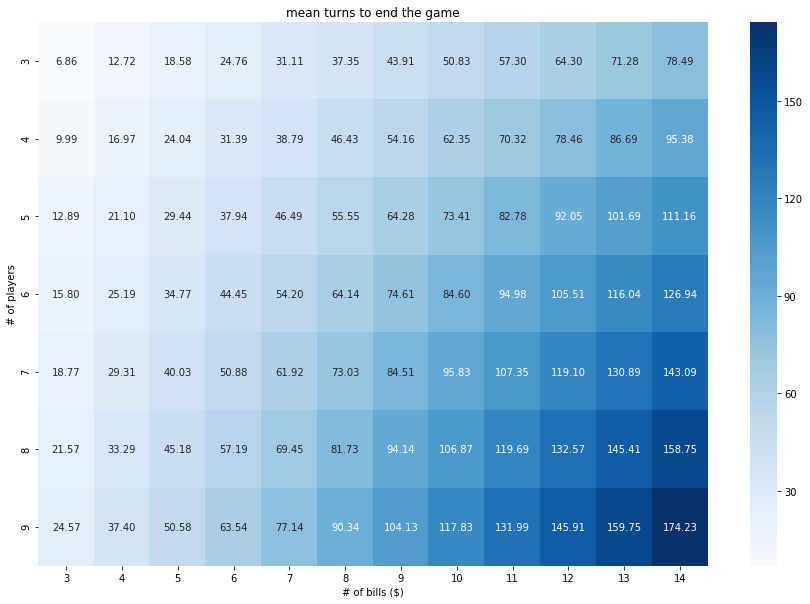

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(heatmap,ax=ax,cmap=plt.cm.Blues,annot=True,fmt='.2f',)
_=ax.set(xticklabels=n_bills,yticklabels=n_players,xlabel='# of bills ($)',ylabel='# of players',
         title='mean turns to end the game')